In [1]:
# Loading the libs

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import zipfile

In [2]:

#Reading the zipped file

zf = zipfile.ZipFile(r'C:\Users\nishantjairath\Downloads\data.csv.zip')

In [3]:
#reading zipped file contents

zf.namelist()

['data.csv']

In [188]:
# Reading the dataset into a df

df_train = pd.read_csv(zf.open('data.csv'),dtype={'CustomerID': str,'InvoiceNo': str}, encoding= 'unicode_escape')

In [189]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [190]:
#encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str}

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [191]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [192]:
df_train['Month'] = pd.to_datetime(df_train['InvoiceDate'])

In [193]:
df_train['Month'] = pd.DatetimeIndex(df_train['Month']).month
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,12


In [194]:
# CustomerID and Desrciption columns have null values
# UnitPrice and Quantity columns have negative values

In [195]:
# Dropping rows without CustomerID

df_train.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
df_train.shape

(406829, 9)

In [196]:
# Dropping duplicate values

print(df_train.duplicated().sum())
df_train.drop_duplicates(inplace=True)

5225


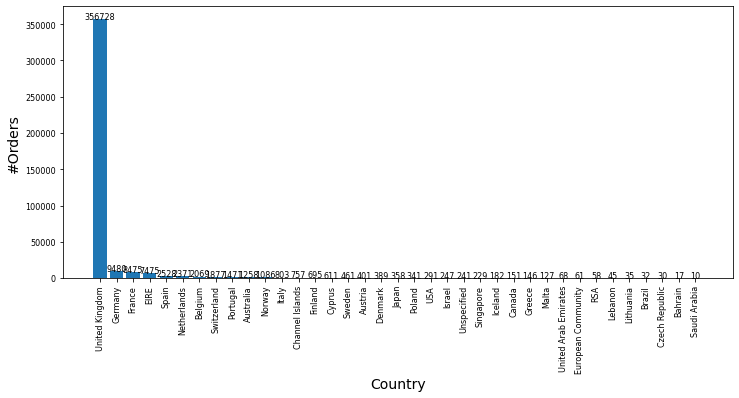

In [197]:
# Plotting Bar graph to check various coutries and the number of orders from each

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

x_axis = df_train['Country'].value_counts().keys().to_list()
y_axis = df_train['Country'].value_counts().to_list()
fig, ax = plt.subplots(figsize = (12, 5))

plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('#Orders')
addlabels(x_axis, y_axis)

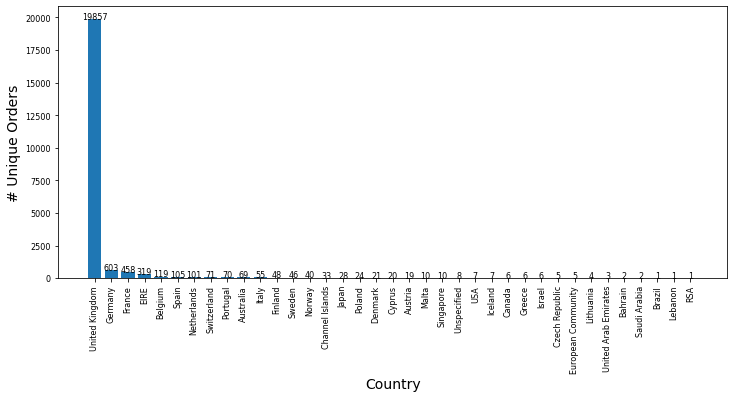

In [198]:
# Above graph shows UK has way more entries than other countries and thus makes it difficult to read

# Grouping the number of orders per customer and invoice at country level

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

temp = df_train[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)

x_axis = temp['Country'].value_counts().keys().to_list()
y_axis = temp['Country'].value_counts().to_list()
fig, ax = plt.subplots(figsize = (12, 5))

plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('# Unique Orders')
addlabels(x_axis, y_axis)

In [199]:
# Heat map based on Country x Month

df_train_grouped = df_train.groupby(['Country', 'Month'])['Quantity'].sum()

In [200]:
df_train_grouped = pd.DataFrame(df_train_grouped)

<AxesSubplot:xlabel='Month', ylabel='Country'>

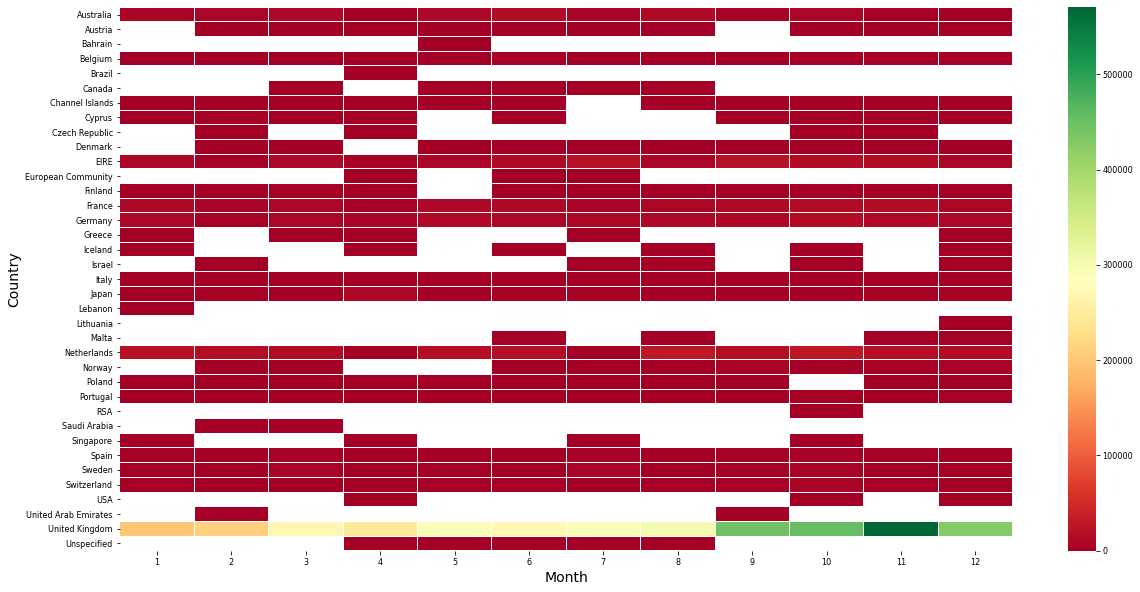

In [201]:
#import plotly.express as px
fig, ax = plt.subplots(figsize = (20, 10))

h = pd.pivot_table(df_train_grouped, values = 'Quantity', 
                   index = ['Country'],
                  columns = 'Month')
sns.heatmap(h, cmap = 'RdYlGn', linewidths = 0.005)

# For many countries the data is present for few months only
# Country name Unspecified is present in the data
# UK tends to lead the Quantity of sales by a huge amount

In [202]:
# Checking orders with negative quantity
 
df_train[df_train['Quantity'].lt(0)]

# All invoice numbers have C prefix

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom,12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom,12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom,12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom,12
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom,12
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom,12
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom,12


In [207]:
# Number of products purchased in every transaction:

temp = df_train.groupby(by = ['CustomerID', 'InvoiceNo'], as_index = False)['InvoiceDate'].count()

nb_products_per_basket = temp.rename(columns = {'InvoiceDate' : 'Number of products'})

In [208]:
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


In [222]:
# Counting the number of transactions corresponding to canceled orders:

#nb_products_per_basket['order_cancelled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: int('Ç' in x))

nb_products_per_basket['order_cancelled'] = nb_products_per_basket['InvoiceNo'].str.find('C')
nb_products_per_basket['order_cancelled'] = nb_products_per_basket['order_cancelled'] + 1

In [223]:
nb_products_per_basket['order_cancelled'].value_counts()

0    18536
1     3654
Name: order_cancelled, dtype: int64

In [224]:
# locate the entries that indicate a negative quantity and check if there is systematically an order indicating the same quantity (but positive), with the same description (CustomerID, Description and UnitPrice)

df_check = df_train[(df_train['Quantity'] < 0) & (df_train['Description'] != 'Discount')] [['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in df_check.iterrows():
    if df_train[(df_train['CustomerID'] == col[0]) & (df_train['Quantity'] == -col[1]) & (df_train['Description'] == col[2])].shape[0] == 0:
        print(index, df_check.loc[index])
        print('Hypothesis not fulfilled')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
Hypothesis not fulfilled


In [225]:
# we find that the initial hypothesis is not verified. Hence, cancellations do not necessarily correspond to orders that would have been made beforehand.


In [226]:
'''
Check two cases:

1. a cancel order exists without counterpart
2. there's at least one counterpart with the exact same quantity

'''
df_initial = df_train.copy()

df_cleaned = df_initial.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_initial.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_initial[(df_initial['CustomerID'] == col['CustomerID']) &
                         (df_initial['StockCode']  == col['StockCode']) & 
                         (df_initial['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_initial['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break     


In [235]:
print("entry to remove: {}".format(len(entry_to_remove)))
print("doubtfull entry: {}".format(len(doubtfull_entry)))

entry to remove: 6151
doubtfull entry: 2607


In [236]:
'''
Lines listed in the doubtfull_entry list correspond to the entries indicating a cancellation but for which there is no command beforehand

Let's drop them all
'''

df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)

In [237]:
# check the number of entries that correspond to cancellations and that have not been deleted with the previous filter:

remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print('no. of entries to delete: {}'.format(remaining_entries.shape[0]))
remaining_entries.head()

no. of entries to delete: 37


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,QuantityCanceled
27329,C538530,22630,DOLLY GIRL LUNCH BOX,-33,12/13/2010 10:26,1.95,14796,United Kingdom,12,0
32870,C539195,22942,CHRISTMAS LIGHTS 10 SANTAS,-5,12/16/2010 12:05,8.50,12748,United Kingdom,12,0
33085,C539221,22941,CHRISTMAS LIGHTS 10 REINDEER,-12,12/16/2010 12:56,8.50,14911,EIRE,12,0
33086,C539221,22942,CHRISTMAS LIGHTS 10 SANTAS,-10,12/16/2010 12:56,8.50,14911,EIRE,12,0
77599,C542744,22700,BLACK AND WHITE DOG BOWL,-10,1/31/2011 16:32,0.85,16191,United Kingdom,1,0


In [ ]:
# The above entries imply that the quantity cancelled for these products by 
# the respective customers is greater than the sum of the previous purchases

In [238]:
# Total price of every purchase

df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,12,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,12,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,12,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,12,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,12,0,20.34


In [239]:
'''
In the dataframe, products are uniquely identified through the StockCode variable. A shrort description of the products is given in the Description variable. In this section, I intend to use the content of this latter variable in order to group the products into different categories.
'''

'\nIn the dataframe, products are uniquely identified through the StockCode variable. A shrort description of the products is given in the Description variable. In this section, I intend to use the content of this latter variable in order to group the products into different categories.\n'

In [242]:
import nltk

In [255]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [261]:
is_noun = lambda pos: pos[:2] == 'NN'


def keywords_inventory(dataframe, colum = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots = dict() # collect the words / root
    keywords_select = dict() # association: root <-> keyword
    
    category_keys = []
    count_keywords = dict()
    icount = 0
    for s in dataframe[colum]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

        for t in nouns:
            t = t.lower()
            racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
                    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k
                    min_length = len(k)
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
    print("No. of keywords in variable '{}' : {}".format(colum, len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [249]:
'''
This function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:

extract the names (proper, common) appearing in the products description
for each name, I extract the root of the word and aggregate the set of names associated with this particular root
count the number of times each root appears in the dataframe
when several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)
The first step of the analysis is to retrieve the list of products:
'''

'\nThis function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:\n\nextract the names (proper, common) appearing in the products description\nfor each name, I extract the root of the word and aggregate the set of names associated with this particular root\ncount the number of times each root appears in the dataframe\nwhen several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)\nThe first step of the analysis is to retrieve the list of products:\n'

In [250]:
df_products = pd.DataFrame(df_initial['Description'].unique()).rename(columns = {0:'Description'})

In [262]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

No. of keywords in variable 'Description' : 1483


In [264]:
count_keywords.items()

dict_items([('heart', 267), ('holder', 120), ('metal', 99), ('lantern', 8), ('cream', 49), ('cupid', 2), ('coat', 7), ('hanger', 19), ('union', 28), ('flag', 12), ('water', 36), ('bottl', 44), ('nest', 3), ('box', 155), ('glass', 149), ('star', 59), ('hand', 20), ('jack', 21), ('warmer', 17), ('dot', 3), ('bird', 45), ('ornament', 1), ('poppi', 7), ('playhous', 4), ('bedroom', 1), ('kitchen', 20), ('feltcraft', 24), ('princess', 3), ('charlott', 11), ('doll', 11), ('ivori', 54), ('cosi', 6), ('colour', 26), ('teaspoon', 1), ('vintag', 211), ('jigsaw', 15), ('block', 9), ('alphabet', 13), ('home', 49), ('build', 3), ('word', 3), ('love', 9), ('recip', 6), ('england', 4), ('jam', 18), ('jar', 39), ('rack', 15), ('pari', 5), ('fashion', 3), ('bath', 8), ('alarm', 7), ('clock', 44), ('bakelik', 4), ('pink', 189), ('green', 14), ('panda', 1), ('bunni', 25), ('sheet', 8), ('tape', 18), ('globe', 1), ('head', 3), ('tail', 4), ('game', 6), ('set/2', 1), ('retrospot', 90), ('tea', 55), ('towel'

In [265]:
#convert the count_keywords dictionary into a list, to sort the keywords according to their occurences:

list_products = []
for k, v in count_keywords.items():
    list_products.append([keywords_select[k], v])
list_products.sort(key = lambda x:x[1], reverse = True)

In [266]:
list_products

[['heart', 267],
 ['vintage', 211],
 ['set', 206],
 ['pink', 189],
 ['bag', 165],
 ['box', 155],
 ['glass', 149],
 ['christmas', 137],
 ['design', 128],
 ['candle', 121],
 ['holder', 120],
 ['flower', 120],
 ['decorative', 109],
 ['metal', 99],
 ['retrospot', 90],
 ['card', 90],
 ['necklac', 85],
 ['paper', 84],
 ['blue', 80],
 ['art', 75],
 ['silver', 72],
 ['cake', 70],
 ['polkadot', 68],
 ['cover', 68],
 ['mug', 66],
 ['tin', 66],
 ['wrap', 65],
 ['sign', 64],
 ['pack', 61],
 ['egg', 61],
 ['bracelet', 61],
 ['star', 59],
 ['bowl', 57],
 ['mini', 56],
 ['tea', 55],
 ['garden', 55],
 ['wall', 55],
 ['ivory', 54],
 ['cushion', 54],
 ['frame', 52],
 ['mirror', 50],
 ['cream', 49],
 ['home', 49],
 ['gift', 49],
 ['earrings', 49],
 ['ring', 46],
 ['bird', 45],
 ['bottle', 44],
 ['clock', 44],
 ['paisley', 42],
 ['letter', 42],
 ['party', 42],
 ['charm', 41],
 ['wood', 40],
 ['ribbon', 40],
 ['jar', 39],
 ['garland', 39],
 ['hook', 39],
 ['gold', 39],
 ['easter', 39],
 ['bead', 38],
 ['dr

In [267]:
# cleaning the list and keeping words which appear more than 13 times

list_products = []
for k, v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink''blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13 : continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])

list_products.sort(key = lambda x:x[1], reverse = True)
print(len(list_products))

195


In [268]:
# use these keywords to create groups of product

list_prod = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), list_prod))
    

In [270]:
X.head()

,heart,vintage,set,pink,bag,box,glass,christmas,design,candle,...,tidy,plant,diner,house,square,craft,lace,jewel,wallet,point
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
# add 6 extra columns to this matrix, where I indicate the price range of the products

threshold = [0, 1, 2, 3, 5, 10]
label_col = []

for i in range(len(threshold)):
    if i == len(threshold) - 1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0
    
for i, prod in enumerate(list_prod):
    prix = df_cleaned[df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold):break
    X.loc[i, label_col[j-1]] = 1

In [272]:
# check the number of products in the different groups

print("{:<8} {:<20} \n".format('group', 'no. products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

group    no. products         
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        156                 


In [275]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [278]:
# Using silhouette score to find best number of clusters

matrix = X.to_numpy()

for n_clusters in range(3, 10):
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "Avg silhouette_score is : ", silhouette_avg)

For n_clusters = 3 Avg silhouette_score is :  0.09631640550695364
For n_clusters = 4 Avg silhouette_score is :  0.12063401787623187
For n_clusters = 5 Avg silhouette_score is :  0.13876988735956963
For n_clusters = 6 Avg silhouette_score is :  0.1387750091620751
For n_clusters = 7 Avg silhouette_score is :  0.14327209054050957
For n_clusters = 8 Avg silhouette_score is :  0.12911067473810853
For n_clusters = 9 Avg silhouette_score is :  0.14341581614289223


In [284]:
#! pip install kmodes # Using hamming distance 

from kmodes.kmodes import KModes

In [287]:
'''
In the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the Hamming's metric. Note that the kmeans method of sklearn uses a Euclidean distance that can be used, but it is not to the best choice in the case of categorical variables

'''

"\nIn the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the Hamming's metric. Note that the kmeans method of sklearn uses a Euclidean distance that can be used, but it is not to the best choice in the case of categorical variables\n\n"

In [286]:
for n_clusters in range(3, 10):
    km = KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    clusters = km.fit_predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "Avg silhouette_score is : ", silhouette_avg)

For n_clusters = 3 Avg silhouette_score is :  0.06964023065631963
For n_clusters = 4 Avg silhouette_score is :  0.07761573025120645
For n_clusters = 5 Avg silhouette_score is :  0.06522641080360297
For n_clusters = 6 Avg silhouette_score is :  0.11900143849993688
For n_clusters = 7 Avg silhouette_score is :  0.04227090777640779
For n_clusters = 8 Avg silhouette_score is :  0.10161740653551495
For n_clusters = 9 Avg silhouette_score is :  0.09001509266881076


In [296]:
'''
In practice, the scores obtained above can be considered equivalent since, depending on the run, scores of  0.1±0.05  will be obtained for all clusters with n_clusters  >  3 (we obtain slightly lower scores for the first cluster). On the other hand, I found that beyond 5 clusters, some clusters contained very few elements. I therefore choose to separate the dataset into 5 clusters. In order to ensure a good classification at every run of the notebook, I iterate untill we obtain the best possible silhouette score, which is, in the present case, around 0.07:
'''

'\nIn practice, the scores obtained above can be considered equivalent since, depending on the run, scores of  0.1±0.05  will be obtained for all clusters with n_clusters  >  3 (we obtain slightly lower scores for the first cluster). On the other hand, I found that beyond 5 clusters, some clusters contained very few elements. I therefore choose to separate the dataset into 5 clusters. In order to ensure a good classification at every run of the notebook, I iterate untill we obtain the best possible silhouette score, which is, in the present case, around 0.07:\n'

In [304]:
n_clusters = 3
silhouette_avg = -1

while silhouette_avg < 0.07:
    km = KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    clusters = km.fit_predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
'''    
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
'''


For n_clusters = 3 The average silhouette_score is : 0.06608016814211806
For n_clusters = 3 The average silhouette_score is : 0.09631640550695364


"    \n    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)\n    clusters = kmeans.predict(matrix)\n    silhouette_avg = silhouette_score(matrix, clusters)\n"

In [305]:
pd.Series(clusters).value_counts()

0    1905
2    1009
1     964
dtype: int64

In [306]:
liste = pd.DataFrame(list_prod)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

In [300]:
occurence

[{'vintage': 90,
  'bag': 93,
  'box': 84,
  'glass': 72,
  'christmas': 34,
  'design': 48,
  'candle': 63,
  'holder': 48,
  'flower': 55,
  'decorative': 7,
  'metal': 39,
  'retrospot': 48,
  'card': 19,
  'necklac': 31,
  'paper': 33,
  'silver': 44,
  'cake': 32,
  'polkadot': 23,
  'cover': 42,
  'mug': 17,
  'tin': 69,
  'wrap': 0,
  'sign': 74,
  'pack': 17,
  'egg': 14,
  'bracelet': 44,
  'star': 25,
  'bowl': 23,
  'mini': 19,
  'tea': 37,
  'garden': 24,
  'wall': 36,
  'ivory': 24,
  'cushion': 30,
  'frame': 34,
  'mirror': 15,
  'cream': 31,
  'home': 11,
  'gift': 12,
  'earrings': 45,
  'ring': 79,
  'bird': 29,
  'bottle': 29,
  'clock': 18,
  'paisley': 15,
  'letter': 8,
  'party': 7,
  'charm': 20,
  'wood': 32,
  'ribbon': 16,
  'jar': 25,
  'garland': 12,
  'hook': 17,
  'gold': 16,
  'easter': 10,
  'bead': 24,
  'drawer': 15,
  'cup': 14,
  'zinc': 10,
  'water': 29,
  'photo': 12,
  'bell': 0,
  'plate': 9,
  'tray': 17,
  'pencil': 1,
  'skull': 11,
  'spot'

In [307]:
#!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

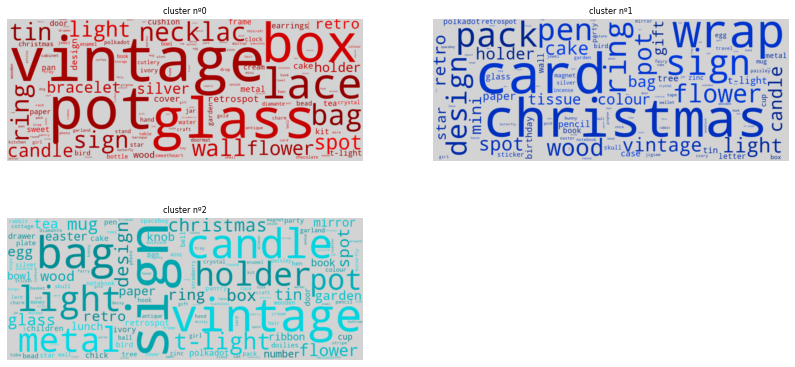

In [308]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)            


In [309]:
'''
In the previous section, the different products were grouped in three clusters. In order to prepare the rest of the analysis, a first step consists in introducing this information into the dataframe. To do this, I create the categorical variable categ_product where I indicate the cluster of each product
'''

'\nIn the previous section, the different products were grouped in five clusters. In order to prepare the rest of the analysis, a first step consists in introducing this information into the dataframe. To do this, I create the categorical variable categ_product where I indicate the cluster of each product\n'

In [310]:
corresp = dict()
for key, val in zip(list_prod, clusters):
    corresp[key] = val

In [314]:
df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)

In [316]:
'''
Create the categ_N variables (with  N∈[0:2] ) that contains the amount spent in each product category:
'''

'\nCreate the categ_N variables (with  N∈[0:2] ) that contains the amount spent in each product category:\n'

In [317]:
for i in range(3):
    col = 'categ_{}'.format(i)
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x>0 else 0)
    
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)

In [326]:
price_temp

8         11.10
9         54.08
13         9.90
32        30.00
35        46.80
          ...  
541894    23.40
541895    19.80
541896    19.80
541901    15.60
541902    23.40
Length: 112713, dtype: float64

In [319]:
df_cleaned.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,QuantityCanceled,TotalPrice,categ_product,categ_0,categ_1,categ_2
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,12,0,10.20,1,0.00,10.2,0.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12,0,12.60,0,12.60,0.0,0.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,12,0,16.60,0,16.60,0.0,0.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,12,0,16.60,0,16.60,0.0,0.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680,France,12,0,14.85,0,14.85,0.0,0.0


In [320]:
'''
Up to now, the information related to a single order was split over several lines of the dataframe (one line per product). I decide to collect the information related to a particular order and put in in a single entry. I therefore create a new dataframe that contains, for each order, the amount of the basket, as well as the way it is distributed over the 3 categories of products:
'''

'\nUp to now, the information related to a single order was split over several lines of the dataframe (one line per product). I decide to collect the information related to a particular order and put in in a single entry. I therefore create a new dataframe that contains, for each order, the amount of the basket, as well as the way it is distributed over the 3 categories of products:\n'

In [333]:
# Aggregate Total Price at Customer and Invoice level

temp = df_cleaned.groupby(['CustomerID', 'InvoiceNo'], as_index = False)['TotalPrice'].sum()

basket_price = temp.rename(columns = {'TotalPrice' : 'Basket Price'})

# segregate the respective totalprice across each cluster

for i in range(3):
    col = 'categ_{}'.format(i)
    temp = df_cleaned.groupby(['CustomerID', 'InvoiceNo'], as_index = False)[col].sum()
    basket_price.loc[:, col] = temp[col]

df_cleaned['InvoiceDate_int'] = pd.to_datetime(df_cleaned['InvoiceDate']).astype('int64')

temp = df_cleaned.groupby(['CustomerID', 'InvoiceNo'], as_index = False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,InvoiceDate
1,12347,537626,711.79,501.19,23.40,187.20,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,260.55,84.34,130.50,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,224.35,81.00,330.90,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,266.72,41.40,74.40,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,413.91,61.30,109.70,2011-08-02 08:48:00.000000000
...,...,...,...,...,...,...,...
18614,18283,557956,192.80,86.66,43.34,62.80,2011-06-23 19:20:00.000000000
18623,18283,580872,208.00,119.03,27.07,61.90,2011-12-06 12:02:00.000001792
18625,18287,570715,1001.32,358.04,256.84,386.44,2011-10-12 10:22:59.999998720
18624,18287,554065,765.28,183.70,40.68,540.90,2011-05-22 10:38:59.999998976


In [334]:
'''
split the data set by retaining the first 10 months to develop the model and the following two months to test it:
'''

'\nsplit the data set by retaining the first 10 months to develop the model and the following two months to test it:\n'

In [335]:
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())

2010-12-01 08:26:00 -> 2011-12-09 12:50:00


In [357]:
set_train = basket_price[(basket_price['InvoiceDate']).astype(object) < datetime.date(2011,10,1)]
set_test  = basket_price[(basket_price['InvoiceDate']).astype(object) >= datetime.date(2011,10,1)]
basket_price = set_train.copy(deep = True)

In [361]:
'''
Consumer Order Combinations
In a second step, I group together the different entries that correspond to the same user. I thus determine the number of purchases made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all the visits:
'''

'\nConsumer Order Combinations\nIn a second step, I group together the different entries that correspond to the same user. I thus determine the number of purchases made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all the visits:\n'

In [362]:
transactions_per_user = basket_price.groupby(['CustomerID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

for i in range(3):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:, col] = basket_price.groupby(['CustomerID'])[col].sum() /\
                                             transactions_per_user['sum']*100
transactions_per_user.reset_index(drop = False, inplace = True)
#basket_price.groupby(['CustomerID'])['categ_0'].sum()

In [363]:
transactions_per_user.head()

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2
0,12347,5,382.52,711.79,558.172000,2790.86,59.720660,10.442659,29.836681
1,12348,4,227.44,892.80,449.310000,1797.24,20.030714,38.016069,41.953217
2,12350,1,334.40,334.40,334.400000,334.40,39.862440,11.692584,48.444976
3,12352,6,144.35,840.30,345.663333,2073.98,86.616072,0.491808,12.892120
4,12353,1,89.00,89.00,89.000000,89.00,86.966292,0.000000,13.033708


In [364]:
'''
Finally, I define two additional variables that give the number of days elapsed since the first purchase ( FirstPurchase ) and the number of days since the last purchase ( LastPurchase ):
'''

'\nFinally, I define two additional variables that give the number of days elapsed since the first purchase ( FirstPurchase ) and the number of days since the last purchase ( LastPurchase ):\n'

In [365]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,LastPurchase,FirstPurchase
0,12347,5,382.52,711.79,558.172000,2790.86,59.720660,10.442659,29.836681,59,297
1,12348,4,227.44,892.80,449.310000,1797.24,20.030714,38.016069,41.953217,5,288
2,12350,1,334.40,334.40,334.400000,334.40,39.862440,11.692584,48.444976,240,240
3,12352,6,144.35,840.30,345.663333,2073.98,86.616072,0.491808,12.892120,2,226
4,12353,1,89.00,89.00,89.000000,89.00,86.966292,0.000000,13.033708,134,134


# Creation of customers categories

In [366]:
'''
The dataframe transactions_per_user contains a summary of all the commands that were made. Each entry in this dataframe corresponds to a particular client. I use this information to characterize the different types of customers and only keep a subset of variables:
'''

'\nThe dataframe transactions_per_user contains a summary of all the commands that were made. Each entry in this dataframe corresponds to a particular client. I use this information to characterize the different types of customers and only keep a subset of variables:\n'

In [370]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2']
#_____________________________________________________________
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].to_numpy()

In [373]:
# Scaling the columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(matrix)
scaled_matrix = scaler.transform(matrix)

In [374]:
'''
At this point, I define clusters of clients from the standardized matrix that was defined earlier and using the k-means algorithm fromscikit-learn. I choose the number of clusters based on the silhouette score 
'''

'\nAt this point, I define clusters of clients from the standardized matrix that was defined earlier and using the k-means algorithm fromscikit-learn. I choose the number of clusters based on the silhouette score \n'

In [377]:
for n_clusters in range(5, 15):
    kmeans = KMeans(n_clusters = n_clusters, init='k-means++', n_init=50)
    clusters_clients = kmeans.fit_predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
    print("For n_clusters =", n_clusters, "Avg silhouette_score is : ", silhouette_avg)

For n_clusters = 5 Avg silhouette_score is :  0.28894788754863304
For n_clusters = 6 Avg silhouette_score is :  0.2899753000784677
For n_clusters = 7 Avg silhouette_score is :  0.250928901161978
For n_clusters = 8 Avg silhouette_score is :  0.26101335836627293
For n_clusters = 9 Avg silhouette_score is :  0.2737952142311016
For n_clusters = 10 Avg silhouette_score is :  0.2622284252476861
For n_clusters = 11 Avg silhouette_score is :  0.26735958965279377
For n_clusters = 12 Avg silhouette_score is :  0.2686721623493208
For n_clusters = 13 Avg silhouette_score is :  0.2554349272164835
For n_clusters = 14 Avg silhouette_score is :  0.25675557671512506


In [378]:
# form above we can see 7 clusters are most appropriate

n_clusters = 7

kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=50)
clusters_clients = kmeans.fit_predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print("For n_clusters =", 7, "Avg silhouette_score is : ", silhouette_avg)

For n_clusters = 7 Avg silhouette_score is :  0.24845482265228502


In [380]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['no. of customers']).T

,0,6,3,1,2,5,4
no. of customers,1647,1065,518,244,108,23,7


In [381]:
'''
look at the quality of the separation through silouhette scores within different clusters:
'''

'\nlook at the quality of the separation through silouhette scores within different clusters:\n'

In [386]:
import matplotlib as mpl
import matplotlib.cm as cm

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 

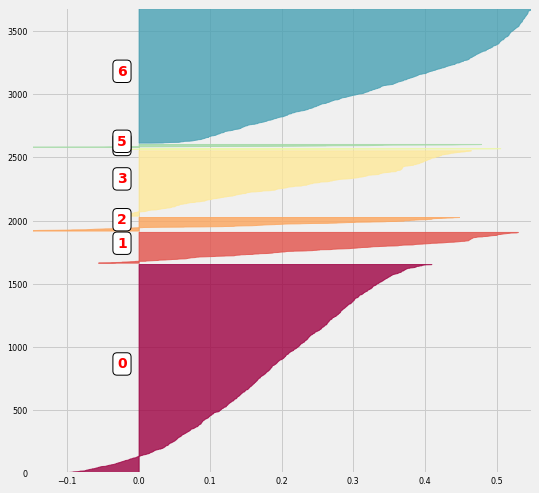

In [387]:
# define individual silhouette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)



# build graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

In [388]:
'''
At this stage, I have verified that the different clusters are indeed disjoint (at least, in a global way). It remains to understand the habits of the customers in each cluster. To do so, I start by adding to the selected_customers dataframe a variable that defines the cluster to which each client belongs:

'''

'\nAt this stage, I have verified that the different clusters are indeed disjoint (at least, in a global way). It remains to understand the habits of the customers in each cluster. To do so, I start by adding to the selected_customers dataframe a variable that defines the cluster to which each client belongs:\n\n'

In [389]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [390]:
'''
Then, I average the contents of this dataframe by first selecting the different groups of clients. This gives access to, for example, the average baskets price, the number of visits or the total sums spent by the clients of the different clusters. I also determine the number of clients in each group (variable size ):
'''

'\nThen, I average the contents of this dataframe by first selecting the different groups of clients. This gives access to, for example, the average baskets price, the number of visits or the total sums spent by the clients of the different clusters. I also determine the number of clients in each group (variable size ):\n'

In [391]:
merged_df = pd.DataFrame()

for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df.drop('CustomerID', axis = 1, inplace = True)
print(merged_df['size'].sum())    

3612


In [393]:
merged_df

,count,min,max,mean,sum,categ_0,categ_1,categ_2,LastPurchase,FirstPurchase,size
cluster,,,,,,,,,,,
0.0,4.081360,233.453388,551.571749,367.977645,1577.525780,59.155589,13.837402,27.015865,77.482696,199.814208,1647
1.0,2.143443,199.021066,320.119467,251.488509,574.667582,25.089424,56.580155,18.330421,97.422131,164.241803,244
2.0,2.240741,1512.641204,2316.347972,1859.157097,4698.821120,63.283329,13.007116,23.710180,91.324074,147.212963,108
3.0,2.467181,228.523591,341.350195,281.910192,710.708902,30.698325,13.978721,55.325827,103.515444,172.283784,518
4.0,27.142857,506.790000,20539.270000,5393.686308,113998.720000,68.055838,7.853886,25.140715,33.571429,285.000000,7
5.0,55.521739,26.449565,2667.718696,543.888129,28303.737826,68.979633,10.766523,20.268810,16.739130,298.869565,23
6.0,2.693897,210.334218,373.022499,283.145450,834.098481,85.749912,4.700020,9.576804,109.523944,189.579343,1065


In [395]:
'''
Finally, I created a representation of the different morphotypes. To do this, I define a class to create "Radar Charts"
'''

'\nFinally, I created a representation of the different morphotypes. To do this, I define a class to create "Radar Charts"\n'

In [479]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 4):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 70)
            else:
                txt.set_rotation(angle - 250)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            #print(grid, grid[1:-1] )
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:]]
            #print(grid_label)
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

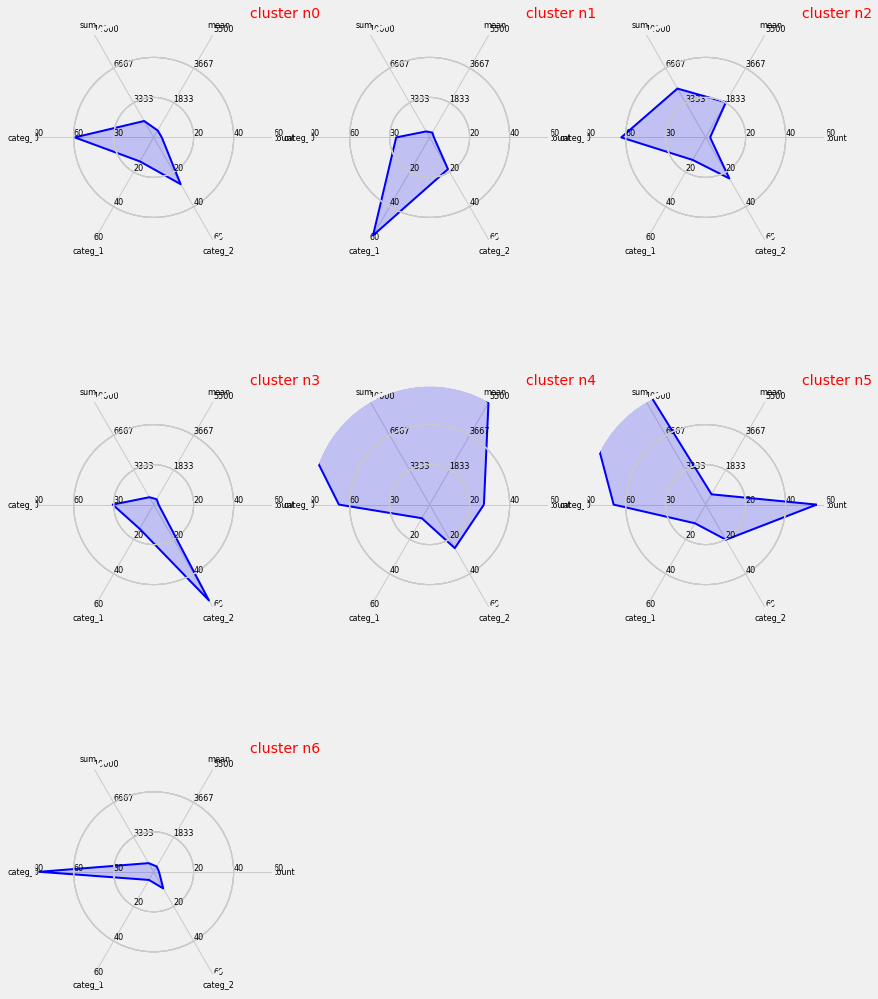

In [484]:
fig = plt.figure(figsize=(10,10))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2']
ranges = [[0, 60], [0, 5500], [0, 10000], [0, 90], [0, 60], [0, 60]]
index = [0, 1, 2, 3, 4, 5, 6]

n_groups = n_clusters
i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3
    iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05)
    pos_y = iy*(size_y + 0.01)
    location = [pos_x, pos_y]
    sizes = [size_x, size_y]

    data = np.array(merged_df.loc[index[ind], attributes])
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth = 2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster n{}'.format(index[ind]), color = 'r')
    ind += 1

# Classification Models ####

In [654]:
# define a class that allows to interface several of the functionalities common to different classifiers:

class Class_Fit(object):
    def __init__(self, clf, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
    
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        
    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
    
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} %".format(100*metrics.accuracy_score(Y, self.predictions)))

In [502]:
from sklearn.model_selection import GridSearchCV

In [486]:
'''
Since the goal is to define the class to which a client belongs and this, as soon as its first visit, I only keep the variables that describe the content of the basket, and do not take into account the variables related to the frequency of visits or variations of the basket price over time:
'''

'\nSince the goal is to define the class to which a client belongs and this, as soon as its first visit, I only keep the variables that describe the content of the basket, and do not take into account the variables related to the frequency of visits or variations of the basket price over time:\n'

In [494]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2']
X = selected_customers[columns]
Y = selected_customers['cluster']

In [491]:
from sklearn.model_selection import train_test_split

In [495]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

# 1. Support Vector Classifier (SVC) #

In [575]:
'''
The first classifier I use is the SVC classifier. In order to use it, I create an instance of the Class_Fit class and then callgrid_search(). When calling this method, I provide as parameters:

the hyperparameters for which I will seek an optimal value
the number of folds to be used for cross-validation

'''
from sklearn.svm import LinearSVC

#from sklearn.svm import SVC
#from sklearn.calibration import CalibratedClassifierCV

In [621]:
svc = Class_Fit(clf = LinearSVC)
#svm = LinearSVC()
#clf = CalibratedClassifierCV(svm)
#svc = Class_Fit(clf = clf)
svc.grid_search(parameters = [{'C': np.logspace(-2, 2, 1, 0)}], Kfold = 10)

In [622]:
# Adjusting the classifier to the training data

svc.grid_fit(X = X_train, Y = Y_train)
#clf.fit(X_train, Y_train)

C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\svm\_base.py

In [506]:
from sklearn import metrics
#from sklearn.metrics import 

In [623]:
# test the quality of prediction

svc.grid_predict(X_test, Y_test)
#result = clf.predict(X_test)

Precision: 83.68 %


In [624]:
metrics.accuracy_score(Y_test, result)

0.9059474412171508

<AxesSubplot:>

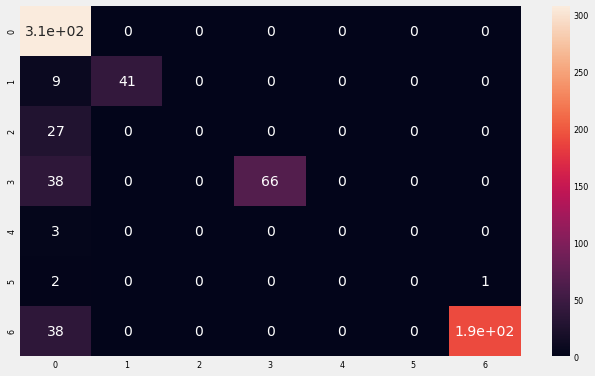

In [625]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test, svc.predictions)

#cnf_matrix = confusion_matrix(Y_test, result)

fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(cnf_matrix, annot = True, ax = ax)
#plt.xticks(rotation=45) 

In [516]:
#import itertools 

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


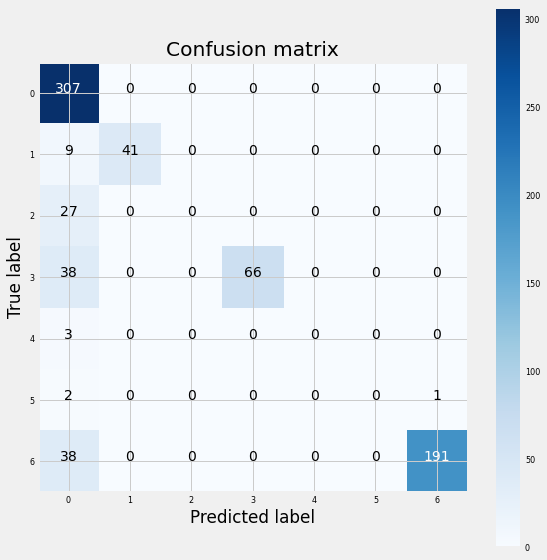

In [627]:
class_names = [i for i in range(7)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
#cnf_matrix = confusion_matrix(Y_test, result) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

In [523]:
'''
A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample. In order to draw this curve, I use the scikit-learn documentation code again
'''

'\nA typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample. In order to draw this curve, I use the scikit-learn documentation code again\n'

In [528]:
# Learning Curve

#from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = -1, train_sizes = np.linspace(0.1, 1, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training set')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label ='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Cross-validation score')
    plt.legend(loc = 'best')
    return plt

C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


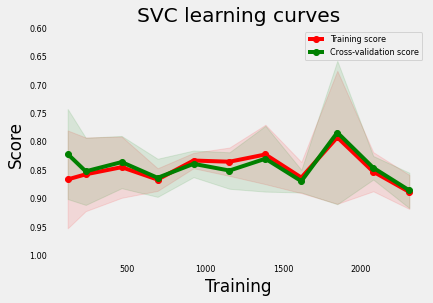

In [628]:
g = plot_learning_curve(svc.grid.best_estimator_, 'SVC learning curves', 
#g = plot_learning_curve(clf.base_estimator, 'SVC learning curves', 
                        X_train, Y_train, 
                        ylim = [1.01, 0.6], 
                        cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [640]:
'''
On this curve, we can see that the train and cross-validation curves stay within the same limit as the sample size increases. 
Moreover, the accuracy score is tending towards 1 with subsequent iterations.
This is typical of modeling with low variance and proves that the model does not suffer from overfitting. 
Also, we can see that the accuracy of the training curve is correct which is synonymous of a low bias. 
Hence the model does not underfit the data.
'''

'\nOn this curve, we can see that the train and cross-validation curves stay within the same limit as the sample size increases. \nMoreover, the accuracy score is tending towards 1 with subsequent iterations.\nThis is typical of modeling with low variance and proves that the model does not suffer from overfitting. \nAlso, we can see that the accuracy of the training curve is correct which is synonymous of a low bias. \nHence the model does not underfit the data.\n'

# 2. K-Nearest Neighbors (KNN) #

In [532]:
from sklearn.neighbors import KNeighborsClassifier

In [534]:
knn = Class_Fit(clf = KNeighborsClassifier)

knn.grid_search(parameters = [{'n_neighbors': np.arange(1, 50, 1)}], Kfold = 5)
knn.grid_fit(X_train, Y_train)
knn.grid_predict(X_test, Y_test)

C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Precision: 89.90 %


C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


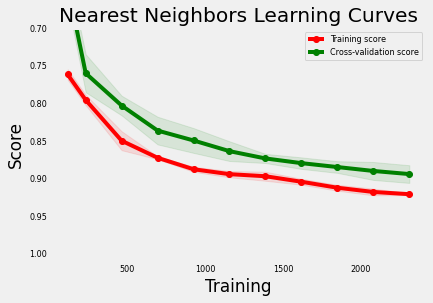

In [535]:
g = plot_learning_curve(knn.grid.best_estimator_, 
                        'Nearest Neighbors Learning Curves', 
                        X_train, Y_train, 
                        ylim = [1.01, 0.7], 
                        cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# 3. Random Forest Classifier (RFC) #

In [536]:
from sklearn.ensemble import RandomForestClassifier

In [538]:
rf = Class_Fit(clf = RandomForestClassifier)

param_grid = {'criterion': ['entropy', 'gini'], 
              'n_estimators': [20, 40, 60, 80, 100],
             'max_features': ['sqrt', 'log2']}

rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X_train, Y_train)
rf.grid_predict(X_test, Y_test)

C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Precision: 95.16 %


In [681]:
Y_train.shape

(2889,)

C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


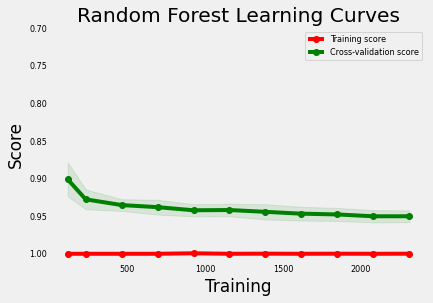

In [540]:
g = plot_learning_curve(rf.grid.best_estimator_, 
                        "Random Forest Learning Curves",
                       X_train, Y_train,
                       ylim = [1.01, 0.7],
                       cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# 4. Gradient Boosting Classifier #

In [541]:
from sklearn.ensemble import GradientBoostingClassifier

In [542]:
gb = Class_Fit(clf = GradientBoostingClassifier)

param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X_train, Y_train)
gb.grid_predict(X_test, Y_test)

C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Precision: 94.74 %


C:\Users\nishantjairath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


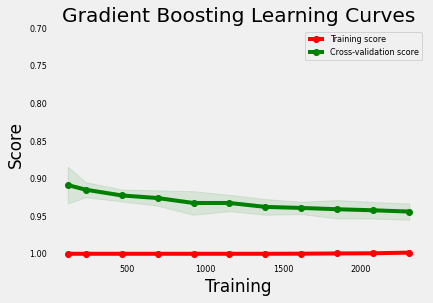

In [543]:
g = plot_learning_curve(gb.grid.best_estimator_, 
                        'Gradient Boosting Learning Curves',
                       X_train, Y_train,
                       ylim = [1.01, 0.7],
                       cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Voting Classifiers #

In [549]:
from sklearn.ensemble import VotingClassifier

In [629]:
# adjust the parameters of the various classifiers using the best parameters previously found:

#svc_best = LinearSVC(**svc.grid.best_params_)
rf_best = RandomForestClassifier(**rf.grid.best_params_)
gb_best = GradientBoostingClassifier(**gb.grid.best_params_)
knn_best = KNeighborsClassifier(**knn.grid.best_params_)

In [631]:
# define a classifier that merges the results of the various classifiers:

#votingC = VotingClassifier(estimators = [('svc', svc_best), ('rf', rf_best), ('gb', gb_best), ('knn', knn_best)], voting = 'soft')
votingC = VotingClassifier(estimators = [('rf', rf_best), ('gb', gb_best), ('knn', knn_best)], voting = 'soft')

In [632]:
votingC = votingC.fit(X_train, Y_train)

In [633]:
# reate a prediction for this model:

predictions = votingC.predict(X_test)

print("Precision: {:.2f} %".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 94.88 %


# Test dataset 

In [635]:
# copy the test dataset

basket_price = set_test.copy(deep = True)

In [656]:
'''
regroup the data according to the same procedure as used on the training set. However, I am correcting the data to take into account the difference in time between the two datasets and weights the variables count and sum to obtain an equivalence with the training set:
'''

'\nregroup the data according to the same procedure as used on the training set. However, I am correcting the data to take into account the difference in time between the two datasets and weights the variables count and sum to obtain an equivalence with the training set:\n'

In [661]:
transactions_per_user = basket_price.groupby(['CustomerID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

for i in range(3):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:, col] = basket_price.groupby(['CustomerID'])[col].sum() /\
                                             transactions_per_user['sum']*100
transactions_per_user.reset_index(drop = False, inplace = True)

# Adjustment for the time range

transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum'] = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending = True)

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2
0,12347,10,224.82,1294.32,759.570000,7595.70,67.285438,12.696657,20.017905
1,12349,5,1757.55,1757.55,1757.550000,8787.75,68.980683,4.513101,26.506216
2,12352,5,311.73,311.73,311.730000,1558.65,58.906746,6.672441,34.420813
3,12356,5,58.35,58.35,58.350000,291.75,100.000000,0.000000,0.000000
4,12357,5,6207.67,6207.67,6207.670000,31038.35,76.434637,5.089832,18.475531
...,...,...,...,...,...,...,...,...,...
2547,18276,5,329.61,329.61,329.610000,1648.05,57.070477,12.590637,30.338885
2548,18277,5,110.38,110.38,110.380000,551.90,55.807211,14.006161,30.186628
2549,18282,5,77.84,77.84,77.840000,389.20,93.525180,6.474820,0.000000
2550,18283,30,1.95,307.05,159.783333,4793.50,54.879524,15.291541,29.828935


In [665]:
# converting dataframe to matrix

list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2']

matrix_test = transactions_per_user[list_cols].to_numpy()
scaled_test_matrix = scaler.transform(matrix_test)

In [666]:
scaled_test_matrix

array([[ 1.05, -0.11,  0.65, ...,  0.28, -0.08, -0.3 ],
       [ 0.23,  4.59,  1.06, ...,  0.36, -0.61,  0.07],
       [ 0.23,  0.16, -0.22, ..., -0.08, -0.47,  0.53],
       ...,
       [ 0.23, -0.56, -0.43, ...,  1.43, -0.48, -1.44],
       [ 4.33, -0.8 , -0.22, ..., -0.26,  0.08,  0.26],
       [ 1.05, -0.58,  0.39, ..., -1.2 ,  0.8 ,  0.86]])

In [667]:
# define the category to which the clients belong

Y = kmeans.predict(scaled_test_matrix)

In [668]:
Y

array([0, 2, 0, ..., 6, 0, 3])

In [669]:
# prepare the execution of the classifier, by selecting the variables on which it acts

columns = ['mean', 'categ_0', 'categ_1', 'categ_2']
X = transactions_per_user[columns]

In [670]:
classifiers = [(svc, 'Support Vector Machine'),
                (knn, 'k-Nearest Neighbors'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Precision: 84.56 %
______________________________ 
k-Nearest Neighbors
Precision: 88.56 %
______________________________ 
Random Forest
Precision: 89.07 %
______________________________ 
Gradient Boosting
Precision: 89.18 %


In [671]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 90.24 % 


# Deep Learning

In [673]:
import tensorflow as tf

In [674]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [704]:
# Initialize ANN

classifier2 = Sequential()

In [705]:
# Adding the input layer

classifier2.add(Dense(units = 4, activation ='relu'))

In [706]:
# Adding first hidden layer

classifier2.add(Dense(units = 3, activation = 'relu'))

# Adding second hidden layer

classifier2.add(Dense(units = 2, activation = 'relu'))

In [707]:
# Adding the output layer

classifier2.add(Dense(7, activation = 'softmax'))

In [708]:
# compiling the ANN

classifier2.compile(optimizer= 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [709]:
classifier_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
 dense_8 (Dense)             (None, 7)                 21        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [710]:
# Early stopping

early_stopping =  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [692]:
Y_train.value_counts()

0    1340
6     836
3     414
1     194
2      81
5      20
4       4
Name: cluster, dtype: int64

In [713]:
model_history = classifier2.fit(X_train, Y_train, validation_split = 0.3, batch_size = 1000, epochs = 100, callbacks = early_stopping )

Epoch 1/100
3/3 [==============================] - 0s 53ms/step - loss: 1.2119 - accuracy: 0.5025 - val_loss: 1.1696 - val_accuracy: 0.5110
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 1.2107 - accuracy: 0.5035 - val_loss: 1.1684 - val_accuracy: 0.5098
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 1.2095 - accuracy: 0.5045 - val_loss: 1.1673 - val_accuracy: 0.5098
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 1.2084 - accuracy: 0.5035 - val_loss: 1.1665 - val_accuracy: 0.5098
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 1.2077 - accuracy: 0.5045 - val_loss: 1.1656 - val_accuracy: 0.5098
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 1.2067 - accuracy: 0.5030 - val_loss: 1.1643 - val_accuracy: 0.5087
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 1.2055 - accuracy: 0.5045 - val_loss: 1.1632 - val_accuracy: 0.5087
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 21ms/step - loss: 1.1542 - accuracy: 0.4990 - val_loss: 1.1190 - val_accuracy: 0.5040
Epoch 60/100
3/3 [==============================] - 0s 22ms/step - loss: 1.1531 - accuracy: 0.4990 - val_loss: 1.1171 - val_accuracy: 0.5029
Epoch 61/100
3/3 [==============================] - 0s 23ms/step - loss: 1.1519 - accuracy: 0.4990 - val_loss: 1.1158 - val_accuracy: 0.5029
Epoch 62/100
3/3 [==============================] - 0s 21ms/step - loss: 1.1510 - accuracy: 0.4970 - val_loss: 1.1149 - val_accuracy: 0.5040
Epoch 63/100
3/3 [==============================] - 0s 22ms/step - loss: 1.1501 - accuracy: 0.4965 - val_loss: 1.1140 - val_accuracy: 0.5040
Epoch 64/100
3/3 [==============================] - 0s 21ms/step - loss: 1.1493 - accuracy: 0.4960 - val_loss: 1.1133 - val_accuracy: 0.5029
Epoch 65/100
3/3 [==============================] - 0s 24ms/step - loss: 1.1488 - accuracy: 0.4975 - val_loss: 1.1128 - val_accuracy: 0.5029
Epoch 66/100
3/3 [========

# Saving the model - Pickle

In [714]:
import pickle

In [718]:
# create an iterator object with write permission - model.pkl

with open('customer_segmentation.pkl', 'wb') as files:
    pickle.dump(votingC, files)

In [719]:
# load saved model
with open('customer_segmentation.pkl' , 'rb') as f:
    lr = pickle.load(f)

In [720]:
# check prediction

lr.predict(X) # similar

array([0, 2, 0, ..., 6, 0, 3])

In [721]:
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, lr.predict(X))))

Precision: 90.24 % 
